In [1]:
import pandas as pd

# Create data files first

In [13]:
# For now we have 3 html tables we stripped manually
# Lets first read our list of regions and create the csv file

with open("data/regions.txt", 'r') as file:
    for line in file:
        line = line.rstrip() + "," + line.rstrip().replace(' ', '-').lower()
        with open("data/regions.csv", 'a') as write_file: # use mode 'a' to append instead of overwrite
            write_file.write(line + "\n")
        print(line)

Ang Mo Kio,ang-mo-kio
Bedok,bedok
Bishan,bishan
Bukit Batok,bukit-batok
Bukit Merah,bukit-merah
Bukit Panjang,bukit-panjang
Bukit Timah,bukit-timah
Central,central
Choa Chu Kang,choa-chu-kang
Clementi,clementi
Geylang,geylang
Hougang,hougang
Jurong East,jurong-east
Jurong West,jurong-west
Kallang,kallang
Marine Parade,marine-parade
Novena,novena
Pasir Ris,pasir-ris
Punggol,punggol
Queenstown,queenstown
Sembawang,sembawang
Sengkang,sengkang
Serangoon,serangoon
Tampines,tampines
Toa Payoh,toa-payoh
Woodlands,woodlands
Yishun,yishun


In [26]:
df = pd.DataFrame()

In [49]:
phase1hottest = pd.read_csv('data/2021phase1hottest.csv', index_col="ID")
phase2a1hottest = pd.read_csv('data/2021phase2a1hottest.csv', index_col="ID")
phase2a1 = pd.read_csv('data/2021phase2a1.csv')

In [50]:
phase1hottest.head()

,School,Phase 1 Vacancy,Applied,Applied %
ID,,,,
1,Horizon,200,138,69%
2,Temasek,160,108,68%
3,Rosyth,230,149,65%
4,Gongshang,170,108,64%
5,Innova,140,88,63%


In [55]:
phase1hottest.rename(columns = {
    'Applied':'Phase 1 Applied',
    'Applied %':'Phase 1 Applied %'
}, inplace=True)

In [56]:
phase1hottest

,School,Phase 1 Vacancy,Phase 1 Applied,Phase 1 Applied %
ID,,,,
1,Horizon,200,138,69%
2,Temasek,160,108,68%
3,Rosyth,230,149,65%
4,Gongshang,170,108,64%
5,Innova,140,88,63%
...,...,...,...,...
177,Blangah Rise,110,18,16%
178,New Town,230,37,16%
179,Montfort Junior,140,20,14%


In [58]:
phase2a1hottest.rename(columns = {
    'Applied':'Phase 2A(1) Applied',
    'Applied %':'Phase 2A(1) Applied %'
}, inplace=True)

In [60]:
phase2a1hottest

,School,Phase 2A(1) Vacancy,Phase 2A(1) Applied,Phase 2A(1) Applied %
ID,,,,
1,CHIJ St. Nicholas Girls’,77,121,157%
2,Rosyth,81,102,126%
3,Pei Hwa Presbyterian,71,86,121%
4,Nanyang,140,150,107%
5,Catholic High,119,123,103%
...,...,...,...,...
177,Yumin,82,0,0%
178,Zhenghua,122,0,0%
179,Zhonghua,110,0,0%


In [63]:
result = pd.merge(phase1hottest, phase2a1hottest, 
         how='outer', on='School')

In [64]:
final = pd.merge(result, phase2a1, how='outer', on='School')

In [65]:
final

,School,Phase 1 Vacancy,Phase 1 Applied,Phase 1 Applied %,Phase 2A(1) Vacancy,Phase 2A(1) Applied,Phase 2A(1) Applied %,Phase 1 Taken,2A(1) Taken,2A(2) Vacancy,Total Vacancy,Vacancy %
0,Horizon,200,138,69%,62,0,0%,138,0,62,240,43%
1,Temasek,160,108,68%,52,41,79%,108,41,11,200,26%
2,Rosyth,230,149,65%,81,102,126%,149,81,0,270,15%
3,Gongshang,170,108,64%,62,37,60%,108,37,25,210,31%
4,Innova,140,88,63%,52,0,0%,88,0,52,180,51%
...,...,...,...,...,...,...,...,...,...,...,...,...
176,Blangah Rise,110,18,16%,92,1,1%,18,1,91,150,87%
177,New Town,230,37,16%,193,0,0%,37,0,193,270,86%
178,Montfort Junior,140,20,14%,120,2,2%,20,2,118,180,88%
179,First Toa Payoh,170,18,11%,152,0,0%,18,0,152,210,91%


In [84]:
schools = ['Red Swastika', 'Kong Hwa', 'Radin Mas', 'Ngee Ann']

In [86]:
chart = final[final['School'].isin(schools)]

In [77]:
print(final['School'])

0                              Horizon
1                              Temasek
2                               Rosyth
3                            Gongshang
4                               Innova
5                          Kheng Cheng
6                           Chongzheng
7                             Waterway
8                 Pei Hwa Presbyterian
9                              Punggol
10                             Nanyang
11                           Alexandra
12                         White Sands
13                           Pasir Ris
14                          Springdale
15                              Rulang
16                         St. Hilda’s
17                  Princess Elizabeth
18                             Ai Tong
19                             Yu Neng
20                       Punggol Green
21                     Holy Innocents’
22                            Kong Hwa
23                              Huamin
24                           Woodlands
25                       

In [87]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

In [92]:
chart

,School,Phase 1 Vacancy,Phase 1 Applied,Phase 1 Applied %,Phase 2A(1) Vacancy,Phase 2A(1) Applied,Phase 2A(1) Applied %,Phase 1 Taken,2A(1) Taken,2A(2) Vacancy,Total Vacancy,Vacancy %
22,Kong Hwa,230,129,56%,101,31,31%,129,31,70,270,41%
44,Radin Mas,160,82,51%,78,30,38%,82,30,48,200,44%
75,Red Swastika,200,94,47%,106,87,82%,94,87,19,240,25%
89,Ngee Ann,200,86,43%,114,2,2%,86,2,112,240,63%


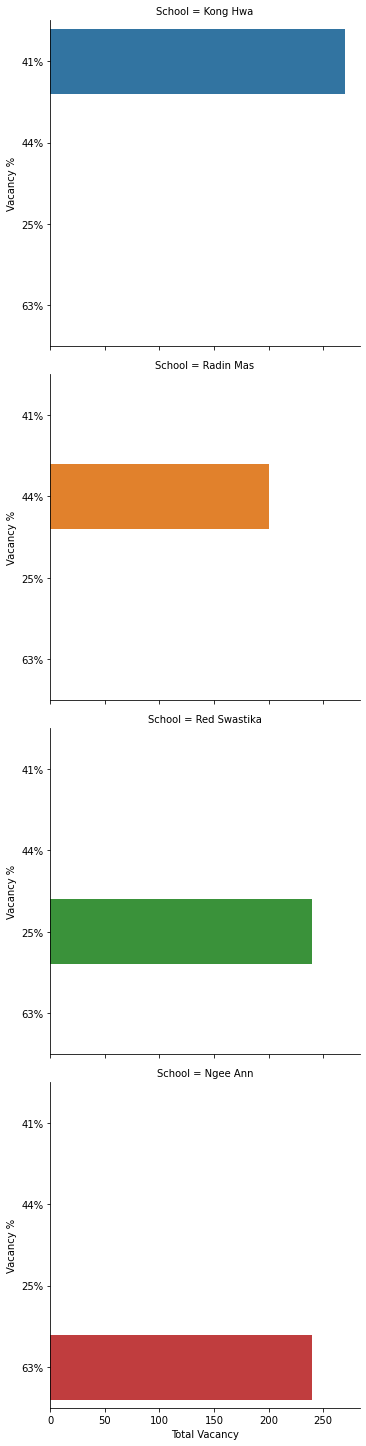

In [101]:
sns.catplot(data=chart, x='Total Vacancy', y='Vacancy %',
            row='School', kind='bar')

<AxesSubplot:xlabel='School', ylabel='Associated Vacancy Taken %'>

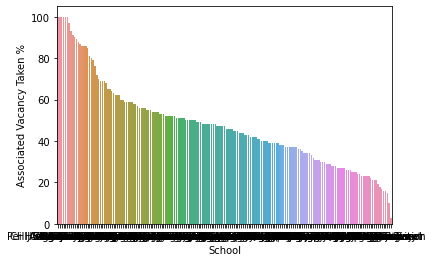

In [42]:
sns.barplot(data=df, x='School', y='Associated Vacancy Taken %')

In [66]:
amk = open("angmokio.txt", 'r')
contents = amk.read()

In [69]:
contents.rstrip()

"Anderson Primary School\n\nAng Mo Kio\n\n19 Ang Mo Kio Ave 9, S569785\n\nAng Mo Kio Primary School\n\nAng Mo Kio\n\n20 Ang Mo Kio Avenue 3, S569920\n\nCHIJ St. Nicholas Girls' School (Primary Section)\n\nAng Mo Kio\n\n501 Ang Mo Kio Street 13, S569405\n\nJing Shan Primary School\n\nAng Mo Kio\n\n5 Ang Mo Kio St 52, S569228\n\nMayflower Primary School\n\nAng Mo Kio\n\n200 Ang Mo Kio Avenue 5, S569878\n\nThe school is currently located at a temporary site, 6 Ang Mo Kio Avenue 2 S(569948), due to upgrading. It will move back to its permanent location, 200 Ang Mo Kio Avenue 5 S(569878) in December 2021.\n\nTeck Ghee Primary School\n\nAng Mo Kio\n\n1 Ang Mo Kio Street 32, S569299\n\nTownsville Primary School\n\nAng Mo Kio\n\n3 Ang Mo Kio Ave 10, S569730\n\nTownsville Primary School and Guangyang Primary School will merge in January 2023. The merged school will be located at Townsville Primary School site."

In [2]:
mylines = []    # Declare an empty list

with open("angmokio.txt", 'r') as file:
    for line in file:
        mylines.append(line.rstrip())

In [3]:
type(mylines)

list

In [9]:
result = filter(None,mylines)

In [10]:
filtered = list(result)

In [11]:
filtered

['Anderson Primary School',
 'Ang Mo Kio',
 '19 Ang Mo Kio Ave 9, S569785',
 'Ang Mo Kio Primary School',
 'Ang Mo Kio',
 '20 Ang Mo Kio Avenue 3, S569920',
 "CHIJ St. Nicholas Girls' School (Primary Section)",
 'Ang Mo Kio',
 '501 Ang Mo Kio Street 13, S569405',
 'Jing Shan Primary School',
 'Ang Mo Kio',
 '5 Ang Mo Kio St 52, S569228',
 'Mayflower Primary School',
 'Ang Mo Kio',
 '200 Ang Mo Kio Avenue 5, S569878',
 'The school is currently located at a temporary site, 6 Ang Mo Kio Avenue 2 S(569948), due to upgrading. It will move back to its permanent location, 200 Ang Mo Kio Avenue 5 S(569878) in December 2021.',
 'Teck Ghee Primary School',
 'Ang Mo Kio',
 '1 Ang Mo Kio Street 32, S569299',
 'Townsville Primary School',
 'Ang Mo Kio',
 '3 Ang Mo Kio Ave 10, S569730',
 'Townsville Primary School and Guangyang Primary School will merge in January 2023. The merged school will be located at Townsville Primary School site.']

In [18]:
for i in range(len(filtered)):
    if(filtered[i] == 'Ang Mo Kio'):
        print(filtered[i-1])
        print(filtered[i+1])

Anderson Primary School
19 Ang Mo Kio Ave 9, S569785
Ang Mo Kio Primary School
20 Ang Mo Kio Avenue 3, S569920
CHIJ St. Nicholas Girls' School (Primary Section)
501 Ang Mo Kio Street 13, S569405
Jing Shan Primary School
5 Ang Mo Kio St 52, S569228
Mayflower Primary School
200 Ang Mo Kio Avenue 5, S569878
Teck Ghee Primary School
1 Ang Mo Kio Street 32, S569299
Townsville Primary School
3 Ang Mo Kio Ave 10, S569730


In [19]:
import pandas as pd

In [20]:
schools = pd.DataFrame(columns=["School", "Area", "Address"])

In [21]:
print(schools)

Empty DataFrame
Columns: [School, Area, Address]
Index: []


In [23]:
for i in range(len(filtered)):
    if(filtered[i] == 'Ang Mo Kio'):
        schools.loc[i, 'School'] = filtered[i-1]
        schools.loc[i, 'Address'] = filtered[i+1]
        schools.loc[i, 'Area'] = filtered[i]

In [24]:
schools

,School,Area,Address
1,Anderson Primary School,Ang Mo Kio,"19 Ang Mo Kio Ave 9, S569785"
4,Ang Mo Kio Primary School,Ang Mo Kio,"20 Ang Mo Kio Avenue 3, S569920"
7,CHIJ St. Nicholas Girls' School (Primary Section),Ang Mo Kio,"501 Ang Mo Kio Street 13, S569405"
10,Jing Shan Primary School,Ang Mo Kio,"5 Ang Mo Kio St 52, S569228"
13,Mayflower Primary School,Ang Mo Kio,"200 Ang Mo Kio Avenue 5, S569878"
17,Teck Ghee Primary School,Ang Mo Kio,"1 Ang Mo Kio Street 32, S569299"
20,Townsville Primary School,Ang Mo Kio,"3 Ang Mo Kio Ave 10, S569730"


In [28]:
def read_file_to_list(file_name):
    mylines = [] 
    # Function that reads a text file and returns a list
    with open(file_name, 'r') as file:
        for line in file:
            mylines.append(line.rstrip())

In [29]:
read_file_to_list('angmokio.txt')

In [30]:
mylines

['Anderson Primary School',
 '',
 'Ang Mo Kio',
 '',
 '19 Ang Mo Kio Ave 9, S569785',
 '',
 'Ang Mo Kio Primary School',
 '',
 'Ang Mo Kio',
 '',
 '20 Ang Mo Kio Avenue 3, S569920',
 '',
 "CHIJ St. Nicholas Girls' School (Primary Section)",
 '',
 'Ang Mo Kio',
 '',
 '501 Ang Mo Kio Street 13, S569405',
 '',
 'Jing Shan Primary School',
 '',
 'Ang Mo Kio',
 '',
 '5 Ang Mo Kio St 52, S569228',
 '',
 'Mayflower Primary School',
 '',
 'Ang Mo Kio',
 '',
 '200 Ang Mo Kio Avenue 5, S569878',
 '',
 'The school is currently located at a temporary site, 6 Ang Mo Kio Avenue 2 S(569948), due to upgrading. It will move back to its permanent location, 200 Ang Mo Kio Avenue 5 S(569878) in December 2021.',
 '',
 'Teck Ghee Primary School',
 '',
 'Ang Mo Kio',
 '',
 '1 Ang Mo Kio Street 32, S569299',
 '',
 'Townsville Primary School',
 '',
 'Ang Mo Kio',
 '',
 '3 Ang Mo Kio Ave 10, S569730',
 '',
 'Townsville Primary School and Guangyang Primary School will merge in January 2023. The merged school wil